In [1]:
import os
import pandas as pd
import numpy as np

os.chdir("C:\\Users\\StuartWilson\\Documents\\Portfolio\\NEISS")

- Get data from 5 years (2015-2019) 

    - add 2020 for coronavirus
    
- Then go to code book to add text descriptions for codes

In [2]:

neiss = pd.DataFrame()
for i in range(15, 21):
    df = pd.read_excel('Data\\NEISS_20'+str(i)+'.XLSX')
    if i == 15:
        col = df.columns
    df = df[col]
    if i == 15:
        neiss = df
    else:
        neiss = pd.concat([neiss, df])

neiss_num = neiss.copy()

neiss['Age'] = np.where(neiss['Age']>199, 0, neiss['Age'])
#neiss['Age'] = neiss[neiss['Age'] != 0]

conditions = [ (neiss['Sex'] == 1), (neiss['Sex'] == 2), (neiss['Sex'] == 0)] 
choice = ['Male', 'Female', 'Not recorded']
neiss['Sex'] = np.select(conditions, choice, default=neiss['Sex'])

conditions = [(neiss['Race']==0), (neiss['Race']==1), (neiss['Race']==2), (neiss['Race']==3),
              (neiss['Race']==4), (neiss['Race']==5), (neiss['Race']==6)]
choice = ['Not Stated', 'White', 'Black/African American', 'Other', 'Asian',
          'American Indian/Alaska Native', 'Native Hawaiian/Pacific Islander']
neiss['Race'] = np.select(conditions, choice, default=neiss['Race'])

body_dict = {33 : 'Arm, lower (not including elbow or wrist)'
				,80 : u'Arm, upper'
				,37 : u'Ankle'
				,94 : u'Ear'
				,32 : u'Elbow'
				,77 : u'Eyeball'
				,76 : u'Face (including eyelid, eye area and nose)'
				,92 : u'Finger'
				,83 : u'Foot'
				,82 : u'Hand'
				,75 : u'Head'
				,0 : u'Internal (use with aspiration and ingestion)'
				,35 : u'Knee'
				,36 : u'Leg, lower (not including knee or ankle)'
				,81 : u'Leg, upper'
				,88 : u'Mouth (including lips, tongue and teeth)'
				,89 : u'Neck'
				,38 : u'Pubic region'
				,30 : u'Shoulder (including clavicle, collarbone)'
				,93 : u'Toe'
				,79 : u'Trunk, lower'
				,31 : u'Trunk, upper (not including shoulders)'
				,34 : u'Wrist'
				,84 : u'25-50% of body'
				,85 : u'All parts of body (more than 50% of body)'
				,87 : u'Not recorded'}
neiss['Body_Part'] = neiss['Body_Part'].replace(body_dict)
neiss['Body_Part_2'] = neiss['Body_Part_2'].replace(body_dict)

diag_dict = {50 : u'Amputation'
				,65 : u'Anoxia'
				,42 : u'Aspirated foreign object'
				,72 : u'Avulsion'
				,48 : u'Burns, scald (from hot liquids or steam)'
				,51 : u'Burns, thermal (from flames or hot surface)'
				,49 : u'Burns, chemical (caustics, etc.)'
				,73 : u'Burns, radiation (includes all cell damage by ultraviolet, x-rays, microwaves, laser beam, radioactive materials, etc.)'
				,46 : u'Burns, electrical'
				,47 : u'Burns, not specified'
				,52 : u'Concussions'
				,53 : u'Contusions, Abrasions'
				,54 : u'Crushing'
				,60 : u'Dental injury'
				,74 : u'Dermatitis, Conjunctivitis'
				,55 : u'Dislocation'
				,67 : u'Electric shock'
				,56 : u'Foreign body'
				,57 : u'Fracture'
				,58 : u'Hematoma'
				,66 : u'Hemorrhage'
				,41 : u'Ingested foreign object'
				,62 : u'Internal organ injury'
				,59 : u'Laceration'
				,61 : u'Nerve damage'
				,68 : u'Poisoning'
				,63 : u'Puncture'
				,64 : u'Strain or Sprain'
				,69 : u'Submersion (including Drowning)'
				,71 : u'Other/Not Stated'}
neiss['Diagnosis'] = neiss['Diagnosis'].replace(diag_dict)
neiss['Diagnosis_2'] = neiss['Diagnosis_2'].replace(diag_dict)


conditions = [(neiss['Disposition']==1), (neiss['Disposition']==2), (neiss['Disposition']==4),
              (neiss['Disposition']==5), (neiss['Disposition']==6), (neiss['Disposition']==8),
              (neiss['Disposition']==9)]
choice = ['Treated and releaased or examined and released without treatment', 
          'Treated and transferred to another hospital', 
          'Treated and admitted for hospitalization (within same facility)',
          'Held for observation',
          'Left without being seen/Left against medical advice (AMA)',
          'Fatality, including DOA, died in the ED, brain dead',
          'Not recorded']
neiss['Disposition'] = np.select(conditions, choice, default=neiss['Disposition'])

conditions = [(neiss['Location']==1), (neiss['Location']==2), (neiss['Location']==4), (neiss['Location']==5),
              (neiss['Location']==6), (neiss['Location']==7), (neiss['Location']==8), (neiss['Location']==9),
              (neiss['Location']==0)]
choice = ['Home', 'Farm/ranch', 'Street or highway', 'Other public property', 'Mobile/Manufactured home',
          'Industrial', 'School/Daycare', 'Place of recreation or sports', 'Not recorded']
neiss['Location'] = np.select(conditions, choice, default=neiss['Location'])

conditions = [(neiss['Fire_Involvement']==1), (neiss['Fire_Involvement']==2), (neiss['Fire_Involvement']==3),
              (neiss['Fire_Involvement']==0)]
choice = ['Fire involvement and/or smoke inhalation - Fire Dept. attended',
          'Fire involvement and/or smoke inhalation - Fire Dept. did not attend',
          'Fire involvement and/or smoke inhalation - Fire Dept. attendance is not recorded',
          'No fire involvement or fire involvement not recorded']
neiss['Fire_Involvement'] = np.select(conditions, choice, default=neiss['Fire_Involvement'])

-hadley has the names of the product codes  
-so pull it from his r package  
-then join it

In [3]:
import rpy2
import rpy2.robjects.packages as packages
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

pandas2ri.activate()
datasets = packages.importr('neiss')
products = packages.data(datasets).fetch('products')['products']

with localconverter(ro.default_converter + pandas2ri.converter):
  products = ro.conversion.rpy2py(products)

neiss = neiss.merge(products, left_on='Product_1', right_on='code')
neiss = neiss.drop(['Product_1', 'code'], axis=1)
neiss = neiss.rename(columns={'title':'Product'})

neiss = neiss.merge(products, left_on='Product_2', right_on='code', how='left')
neiss = neiss.drop(['Product_2', 'code'], axis=1)
neiss = neiss.rename(columns={'title':'Product_2'})

neiss = neiss.merge(products, left_on='Product_3', right_on='code', how='left')
neiss = neiss.drop(['Product_3', 'code'], axis=1)
neiss = neiss.rename(columns={'title':'Product_3'})


In [4]:
neiss['Year'] = pd.DatetimeIndex(neiss['Treatment_Date']).year

neiss_2020 = neiss.loc[neiss['Year']==2020]
neiss = neiss.loc[neiss['Year']!=2020]

In [5]:
neiss.shape

(1841588, 26)

In [6]:
neiss.columns

Index(['CPSC_Case_Number', 'Treatment_Date', 'Age', 'Sex', 'Race',
       'Other_Race', 'Hispanic', 'Body_Part', 'Diagnosis', 'Other_Diagnosis',
       'Body_Part_2', 'Diagnosis_2', 'Other_Diagnosis_2', 'Disposition',
       'Location', 'Fire_Involvement', 'Alcohol', 'Drug', 'Narrative',
       'Stratum', 'PSU', 'Weight', 'Product', 'Product_2', 'Product_3',
       'Year'],
      dtype='object')

In [7]:
pd.options.display.max_columns = None

neiss.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Alcohol,Drug,Narrative,Stratum,PSU,Weight,Product,Product_2,Product_3,Year
0,150103216,2015-01-01,2,Female,White,NaN,NaN,"Face (including eyelid, eye area and nose)","Contusions, Abrasions",NaN,NaN,NaN,NaN,Treated and releaased or examined and released...,Home,No fire involvement or fire involvement not re...,NaN,NaN,"2 YOF,PT WAS CLIMBING ON A BAR STOOL WHEN IT F...",S,84,78.5926,barstools or kitchen stools,NaN,NaN,2015
1,150117280,2015-01-02,69,Female,Not Stated,NaN,NaN,Ankle,Fracture,NaN,NaN,NaN,NaN,Treated and releaased or examined and released...,Home,No fire involvement or fire involvement not re...,NaN,NaN,69YOF FELL OFF A BAR STOOL AT HOME AND SUSTAIN...,M,63,97.9239,barstools or kitchen stools,NaN,NaN,2015
2,150121820,2015-01-08,2,Male,White,NaN,NaN,Head,Internal organ injury,NaN,NaN,NaN,NaN,Treated and releaased or examined and released...,Home,No fire involvement or fire involvement not re...,NaN,NaN,02YOM AT HOME FELL OFF BAR STOOL HITTING HEAD/...,S,94,78.5926,barstools or kitchen stools,NaN,NaN,2015
3,150127724,2015-01-11,54,Male,Black/African American,NaN,NaN,"Trunk, lower",Strain or Sprain,NaN,NaN,NaN,NaN,Treated and releaased or examined and released...,Home,No fire involvement or fire involvement not re...,NaN,NaN,54 Y/O M FELL OFF STOOL AND STRAINED LOWER BACK,S,70,78.5926,barstools or kitchen stools,NaN,NaN,2015
4,150129528,2015-01-09,2,Male,Black/African American,NaN,NaN,Head,Internal organ injury,NaN,NaN,NaN,NaN,Treated and releaased or examined and released...,Home,No fire involvement or fire involvement not re...,NaN,NaN,2YOM FELL INTO BARSTOOL THEN TO FLOOR; DX DENT...,C,20,5.6748,barstools or kitchen stools,floors or flooring materials,NaN,2015


-Start with simple exploration of data  


-Find top 10 products that cause injuries

In [8]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns

prod_top = pd.DataFrame(neiss.groupby('Product', as_index=False)['Weight'].sum()).sort_values(by='Weight', ascending=False).head(10)

prod_top = prod_top.replace({
    'floors or flooring materials':'Floors',
    'stairs or steps':'Stairs',
    'beds or bedframes, other or not spec':'Beds/Bedframes',
    'bicycles and accessories (excl mountain':'Bicycling',
    'basketball (activity, apparel or equip.)':'Basketball',
    'chairs, other or not specified':'Chairs',
    'bathtubs or showers':'Bathtubs/Showers',
    'exercise (activity or apparel, w/o equip':'Exercise w/o Equip.',
    'knives, not elsewhere classified':'Knives',
    'football (activity, apparel or equip.)':'Football'})

In [9]:
prod_top

,Product,Weight
283,Floors,6.333197e+06
668,Stairs,5.760976e+06
78,Beds/Bedframes,3.612644e+06
66,Basketball,2.279216e+06
82,Bicycling,2.192968e+06
123,Chairs,1.710333e+06
290,Football,1.689309e+06
70,Bathtubs/Showers,1.595071e+06
251,Exercise w/o Equip.,1.551306e+06
397,Knives,1.541735e+06


<ipython-input-10-b179a2955d1c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '1', '2', '3','4', '5', '6'])


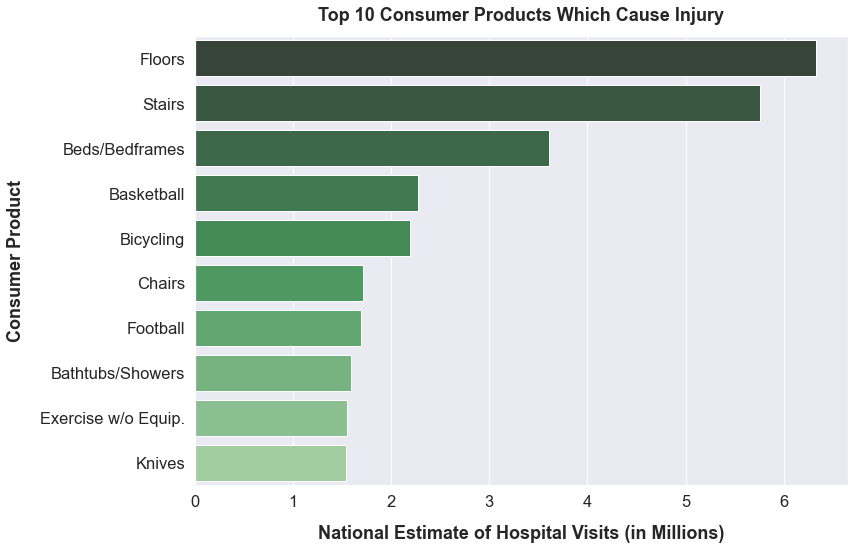

In [10]:
sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27)
fig = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x="Weight", y="Product", data=prod_top, orient='h', 
                 palette='Greens_r_d')
ax.set_title('Top 10 Consumer Products Which Cause Injury', weight='bold',
             pad=15)
ax.set_ylabel('Consumer Product', weight='bold', labelpad=15)
ax.set_xlabel('National Estimate of Hospital Visits (in Millions)', weight='bold',
              labelpad=15)
ax.set_xticklabels(['0', '1', '2', '3','4', '5', '6'])
plt.savefig('Graphs\\top10_prod.png', bbox_inches='tight')

-Find what body parts are most injured in basketball 

-Then see what particular injuries are most common for each body part

c:\Users\StuartWilson\Documents\Portfolio\NEISS\Python\.venv\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


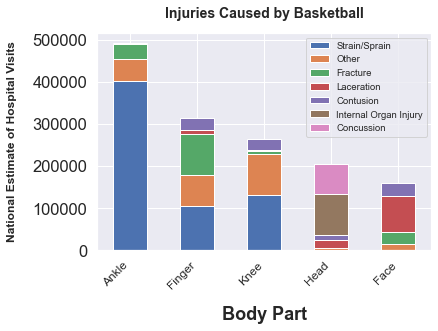

In [11]:
bball = neiss.loc[neiss['Product']=='basketball (activity, apparel or equip.)']
bball_bodypart = pd.DataFrame(bball.groupby('Body_Part', 
                  as_index=False)['Weight'].sum()).sort_values(by='Weight',
                  ascending=False).head(5)
bodypart = bball_bodypart['Body_Part']
bball = bball.loc[bball['Body_Part'].isin(bodypart)==True]
bball_diagnosis = pd.DataFrame(bball.groupby('Diagnosis', as_index=False)
                  ['Weight'].sum()).sort_values(by='Weight', ascending=False).head(7)
diagnosis = bball_diagnosis['Diagnosis']
bball.loc[~bball['Diagnosis'].isin(diagnosis), 'Diagnosis'] = 'Other/Not Stated'
bball_bodypart =  pd.DataFrame(bball.groupby(['Body_Part', 'Diagnosis'], 
                  as_index=False)['Weight'].sum()).sort_values(by='Weight',
                  ascending=False)
bball_bodypart = bball_bodypart.loc[bball_bodypart['Body_Part'].isin(bodypart)==True]

bball_pivot = bball_bodypart.copy()
bball_pivot = bball_pivot.pivot(columns='Diagnosis', index='Body_Part').fillna(0)
bball_pivot = bball_pivot.rename(index={
    'Face (including eyelid, eye area and nose)':'Face',
    'Shoulder (including clavicle, collarbone)':'Shoulder',
    'Leg, lower (not including knee or ankle)':'Lower Leg',
    'Trunk, lower':'Lower Trunk'
})
bball_pivot['Total'] = bball_pivot.sum(axis=1)
bball_pivot.loc['Total']=bball_pivot.sum()
bball_pivot = bball_pivot.sort_values('Total', axis=1, ascending=False)
bball_pivot = bball_pivot.drop('Total')
bball_pivot = bball_pivot.sort_values('Total', ascending=False)
bball_pivot = bball_pivot.drop(['Total'], axis=1)
bball_pivot.columns = ['Strain/Sprain', 'Other', 'Fracture', 'Laceration',
                       'Contusion', 'Internal Organ Injury', 'Concussion']

sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.5)
#a4_dims = (11.7, 8.27)
#fig = plt.subplots(figsize=a4_dims)
sns.color_palette("hls", 10)
bball_pivot.plot(kind='bar', stacked=True, legend=True)
plt.legend(loc=1, prop={'size': 9.5})
plt.title('Injuries Caused by Basketball', weight='bold', pad=15, fontsize=14)
plt.ylabel('National Estimate of Hospital Visits', weight='bold', 
           labelpad=15, fontsize=12)
plt.xlabel('Body Part', weight='bold', labelpad=15)
plt.xticks(rotation=45, ha="right", fontsize=12)

plt.savefig('Graphs\\bball_injuries.png', bbox_inches='tight')
plt.show()

-explore data on scissors 


-what ranking is it in injury-causing products

In [12]:
all_prod = pd.DataFrame(neiss.groupby('Product', as_index=False)['Weight'].sum())
#.sort_values(by='Weight', ascending=False).head(1000)
scissor = all_prod.loc[(all_prod['Product']=='manual scissors') | (all_prod['Product']=='scissors, not specified')]['Weight'].sum()
all_prod.loc[-1] = ['Scissors', scissor]
all_prod['Rank'] = all_prod['Weight'].rank(ascending=False)
all_prod.loc[all_prod['Product']=='Scissors']

,Product,Weight,Rank
-1,Scissors,96793.6992,117.0


-plot scissor-related injuries against age

-also separate by sex

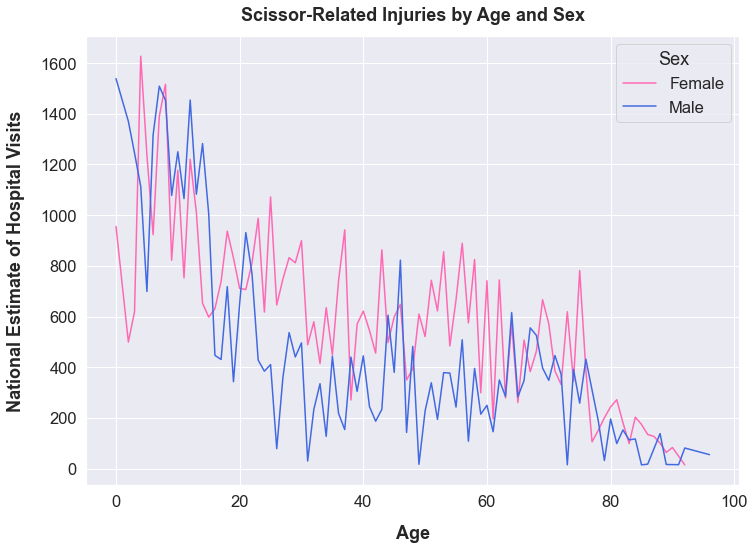

In [13]:
scissors_codes = ['manual scissors', 'scissors, not specified']
scissors = neiss.loc[neiss['Product'].isin(scissors_codes)==True, :]
scissors_agesex = pd.DataFrame(scissors.groupby(['Age', 'Sex'], as_index=False)['Weight'].sum()).sort_values(by='Weight', ascending=False)

sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27)
fig = plt.subplots(figsize=a4_dims)
colors = {'Female':'hotpink', 'Male':'royalblue'}
ax = sns.lineplot(x='Age', y='Weight', data=scissors_agesex, hue='Sex', palette=colors)
ax.set_title('Scissor-Related Injuries by Age and Sex', weight='bold',
             pad=15)
ax.set_ylabel('National Estimate of Hospital Visits', weight='bold', labelpad=15)
ax.set_xlabel('Age', weight='bold',
              labelpad=15)
plt.savefig('Graphs\\scissor_agesex.png', bbox_inches='tight')

-are children prone to "poking their eyes out" with scissors

<ipython-input-14-5392c83d3ca4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sci_kids['Body_Part'] = sci_kids['Body_Part'].replace(['Face (including eyelid, eye area and nose)',
c:\Users\StuartWilson\Documents\Portfolio\NEISS\Python\.venv\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


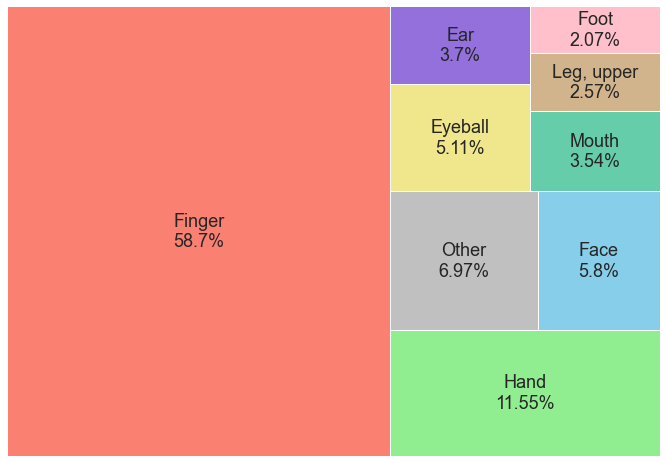

In [14]:
sci_kids = scissors.loc[scissors['Age'] <= 10]
sci_kids['Body_Part'] = sci_kids['Body_Part'].replace(['Face (including eyelid, eye area and nose)',
                                                       'Mouth (including lips, tongue and teeth)',
                                                       'Arm, lower (not including elbow or wrist)'],
                                                       ['Face', 'Mouth', 'Arm, lower'])
body_parts = ['Finger', 'Hand', 'Eyeball', 'Face', 'Mouth', 'Ear', 'Leg, upper', 'Foot']
sci_kids.loc[sci_kids['Body_Part'].isin(body_parts)==False, 'Body_Part'] = 'Other' 

sci_kids_bodypart = pd.DataFrame(sci_kids.groupby(['Body_Part'], as_index=False)['Weight'].sum()).sort_values(by='Weight', ascending=False)


total = sci_kids_bodypart['Weight'].sum()
for ele in sci_kids_bodypart['Body_Part']:
    perc = (sci_kids_bodypart['Weight']/total * 100).round(2)
    sci_kids_bodypart['Treemap'] = sci_kids_bodypart['Body_Part'] + str('\n' ) + perc.astype(str) + '%'

import squarify
sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27)
fig = plt.subplots(figsize=a4_dims)

squarify.plot(sizes=sci_kids_bodypart['Weight'], label=sci_kids_bodypart['Treemap'], alpha=1,
              color=['salmon', 'lightgreen', 'silver', 'skyblue', 'khaki', 'mediumpurple', 
                     'mediumaquamarine', 'tan', 'pink'])
plt.axis('off')
plt.savefig('Graphs\\scissor_treemap.png', bbox_inches='tight')


In [15]:
trashcan = neiss.loc[neiss['Product']=='waste containers, trash baskets or refus']

In [16]:
pd.set_option('display.max_colwidth', None)

trashcan['Narrative'].head(3)

1970114       53YM WAS PUSHING THE GARBAGE DOWN IN THE GARBAGE CAN&CUT HAND ON ?SHARP?OBJ>>LAC
1970115    RT ANKLE AND FOOT SPRAIN.27YOF WAS WAKING OUT TRASH CAN AND SLIPPED ANDFELL ON ICE.
1970116                                                 RT RIB FX.90YOM FELL INTO A TRASH CAN.
Name: Narrative, dtype: object

In [17]:
sci_run = scissors.loc[(scissors['Narrative'].str.contains(' RAN ')) | (scissors['Narrative'].str.contains(' RUN'))]
sci_notrun = scissors.loc[(~scissors['Narrative'].str.contains(' RAN ')) & (~scissors['Narrative'].str.contains(' RUN'))]

In [18]:
pd.set_option('display.max_rows', None)

sci_run['Narrative'].head(3)

1869524    3 YOM WAS RUNNING AROUND W/BLUT TIPPED SCISSORS & FELL LANDING ON THEM.DX: .5 CM EYELID LAC.
1869628           13 YOF CUT RIGHT THUMB ON SCISSORS WHILE RUNNING AT HOME HOMEDX: LACERATION OF FINGER
1869724                                                   5YOF RUNNING AND FELL ON SCISSORS; DX TOE LAC
Name: Narrative, dtype: object

In [19]:
sci_run['Weight'].sum()/scissors['Weight'].sum()

0.006652132373508874

In [20]:
sci_run_kids = sci_kids.loc[(sci_kids['Narrative'].str.contains(' RAN ')) | (sci_kids['Narrative'].str.contains(' RUN'))]
sci_notrun_kids = sci_kids.loc[(~sci_kids['Narrative'].str.contains(' RAN ')) & (~sci_kids['Narrative'].str.contains(' RUN'))]

In [21]:
sci_run_kids['Weight'].sum()/sci_kids['Weight'].sum()

0.019238715684583386

-Corona impact

In [22]:
neiss_corona = neiss.append(neiss_2020)

neiss_corona.shape

(2147057, 26)

<ipython-input-23-798c479e0e44>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(yticklabels=['0', '2', '4', '6', '8', '10', '12', '14'])


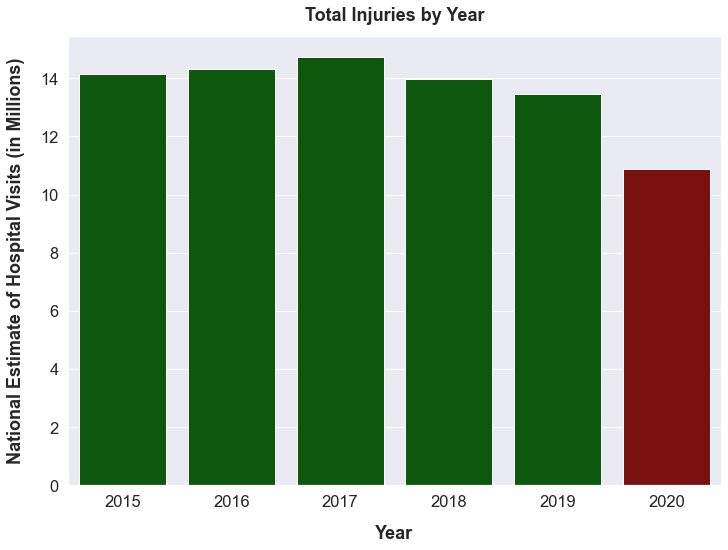

In [23]:
neiss_yrs = pd.DataFrame(neiss_corona.groupby('Year', as_index=False)['Weight'].sum())

sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27)
fig = plt.subplots(figsize=a4_dims)
labels = np.array(neiss_yrs['Year'])
colors = ['darkred' if (x == 2020) else 'darkgreen' for x in labels]
ax = sns.barplot(x="Year", y="Weight", data=neiss_yrs, palette=colors)
ax.set_title('Total Injuries by Year', weight='bold', pad=15)
ax.set_ylabel('National Estimate of Hospital Visits (in Millions)', weight='bold', labelpad=15)
ax.set_xlabel('Year', weight='bold', labelpad=15)
ax.set(yticklabels=['0', '2', '4', '6', '8', '10', '12', '14'])
plt.savefig('Graphs\\year_corona_bar.png', bbox_inches='tight')

In [24]:
neiss_yrs.sort_values('Year')

,Year,Weight
0,2015,1.413270e+07
1,2016,1.431940e+07
2,2017,1.472769e+07
3,2018,1.395903e+07
4,2019,1.346403e+07
5,2020,1.088329e+07


In [25]:
neiss_corona['Month'] = pd.DatetimeIndex(neiss_corona['Treatment_Date']).month 
neiss_months = pd.DataFrame(neiss_corona.groupby(['Year', 'Month'], as_index=False)['Weight'].sum())

In [26]:
neiss_2020_months = neiss_months.loc[neiss_months['Year']==2020]

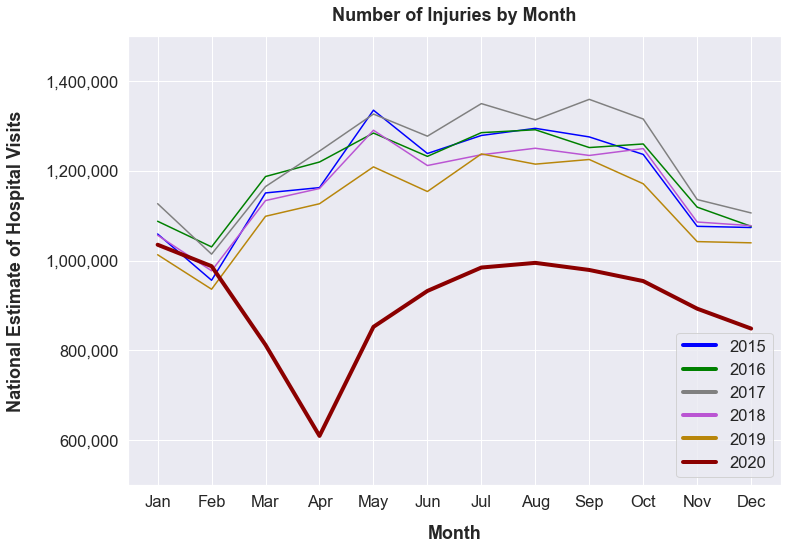

In [27]:

mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = {2015:'blue', 2016:'green', 2017:'grey', 2018:'mediumorchid', 2019:'darkgoldenrod', 2020:'darkred'}
sns.set(font_scale = 1.5)
a4_dims = (11.7, 8.27)
fig = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x='Month', y='Weight', data=neiss_months, hue='Year', palette=colors)
ax2 = sns.lineplot(x='Month', y='Weight', data=neiss_2020_months,  color='darkred', linewidth=4)
ax2.get_legend().remove()
ax.set_title('Number of Injuries by Month', weight='bold', pad=15)
ax.set_ylabel('National Estimate of Hospital Visits', weight='bold', labelpad=20)
ax.set(ylim=(500000, 1500000))
ax.set_yticks([600000, 800000, 1000000, 1200000, 1400000])
ax.set_yticklabels(['600,000', '800,000', '1,000,000', '1,200,000', '1,400,000'])
ax.set_xlabel('Month', weight='bold', labelpad=15)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(mon)
leg = ax.legend(loc=4)
for line in leg.get_lines():
    line.set_linewidth(4.0)
plt.savefig('Graphs\\corona_month.png', bbox_inches='tight')

-products with biggest change

In [28]:
corona_products = pd.DataFrame(neiss_corona.groupby(['Year', 'Product'], as_index=False)['Weight'].sum())
years = [2019, 2020]
corona_products = corona_products.loc[corona_products['Year'].isin(years)==True]

corona_products = corona_products.pivot(index='Product', columns='Year')
corona_products.columns = ['2019 Injury Estimate', '2020 Injury Estimate']
corona_products['Yearly Difference'] = corona_products['2020 Injury Estimate'] - corona_products['2019 Injury Estimate']
corona_products['Percent Change'] = ((corona_products['Yearly Difference'] / corona_products['2019 Injury Estimate']) * 100).round(2)


corona_products = corona_products.loc[(corona_products['2019 Injury Estimate'] >= 4000) |
                                      (corona_products['2020 Injury Estimate'] >= 4000)]
corona_products = corona_products.loc[corona_products['Yearly Difference'].abs() > 1000]
corona_products.head()

,2019 Injury Estimate,2020 Injury Estimate,Yearly Difference,Percent Change
Product,,,,
adhesives,6606.4904,5392.7430,-1213.7474,-18.37
air conditioners,12340.3786,10472.3680,-1868.0106,-15.14
"all-terrain vehicles, 4 wheels only (exc",63987.7088,66262.9031,2275.1943,3.56
"all-terrain vehicles, no. wheels ns (exc",24001.8714,35855.3885,11853.5171,49.39
amusement attractions (including rides),27028.3239,9519.2792,-17509.0447,-64.78


In [29]:
exclude = ['sports or recreational activity, n.e.c.', 'football (activity, apparel or equip.)',
           'all-terrain vehicles, no. wheels ns (exc', 'all-terrain vehicles, no. wheels ns (exc',
           'other grills or stoves', 'utility vehicles', 'two-wheeled, powered, off-road vehicles']
corona_products = corona_products.loc[corona_products.index.isin(exclude) == False]

biggest_drop = corona_products.sort_values('Percent Change').head(10)
plus = lambda x: '+'+str(x) if x>0 else x
biggest_drop['Percent Change'] = biggest_drop['Percent Change'].apply(plus)
biggest_drop['Percent Change'] = biggest_drop['Percent Change'].astype(str) + '%'
biggest_drop = biggest_drop.rename(index = {
    'lacrosse (activity, apparel or equipment':'Lacrosse',
    'rugby (activity, apparel or equipment)':'Rugby',
    'sports or recreational activity, n.e.c.':'Sports or Recreational Activity, Not Elsewhere Classfied',
    'amusement attractions (including rides)':'Amusement Attractions',
    'cheerleading (activity, apparel or equip':'Cheerleading',
    'water slides, public (stationary amuseme':'Water Slides, Public',
    'ball sports (activity, apparel or equipm':'Ball Sports (e.g. Dodgeball, Kickball, etc.)',
    'track & field (activity, apparel or equi':'Track & Field',
    'bleachers':'Bleachers',
    'monkey bars or other playground climbing':'Monkey Bars or Other Playground Climbing',
    'umbrellas':'Umbrellas'
})

print(biggest_drop.to_markdown())

| Product                                      |   2019 Injury Estimate |   2020 Injury Estimate |   Yearly Difference | Percent Change   |
|:---------------------------------------------|-----------------------:|-----------------------:|--------------------:|:-----------------|
| Lacrosse                                     |               13763.4  |                3634.11 |           -10129.3  | -73.6%           |
| Rugby                                        |                8251.09 |                2361.74 |            -5889.35 | -71.38%          |
| Amusement Attractions                        |               27028.3  |                9519.28 |           -17509    | -64.78%          |
| Cheerleading                                 |               29837.7  |               10532.3  |           -19305.4  | -64.7%           |
| Water Slides, Public                         |                5752.99 |                2047.03 |            -3705.96 | -64.42%          |
| Ball Sports (e.g. 

In [30]:
biggest_gain = corona_products.sort_values('Percent Change', ascending=False).head(10)
biggest_gain = biggest_gain.rename(index = {
    'respiratory protection devices':'Respiratory Protection Devices',
    'outdoor patio heaters or firepits (manuf':'Outdoor Patio Heaters or Firepits',
    'mountain or all-terrain bicycles and ac':'Mountain or All-terrain Bicycles',
    'in-line skating (activity, apparel, eq.)':'In-line Skating',
    'fireworks':'Fireworks',
    'water tubing (activity, apparel or equip':'Water Tubing',
    'mopeds or power-assisted cycles':'Mopeds or Power-assisted Cycles',
    'archery (activity, apparel or equipment)':'Archery',
    'portable circular power saws':'Portable Circular Power Saws',
    'paints, varnishes or shellacs':'Paints or Varnishes'
})

print(biggest_gain.to_markdown())

| Product                           |   2019 Injury Estimate |   2020 Injury Estimate |   Yearly Difference |   Percent Change |
|:----------------------------------|-----------------------:|-----------------------:|--------------------:|-----------------:|
| Respiratory Protection Devices    |                180.833 |                4352.16 |             4171.33 |          2306.73 |
| Outdoor Patio Heaters or Firepits |               3104.17  |                5703.51 |             2599.34 |            83.74 |
| Mountain or All-terrain Bicycles  |               9261.11  |               15292.8  |             6031.73 |            65.13 |
| In-line Skating                   |               7869.12  |               12558.9  |             4689.77 |            59.6  |
| Fireworks                         |               9802.2   |               15009.2  |             5206.98 |            53.12 |
| Water Tubing                      |               5568.05  |                8072.1  |          

-diagnosis

In [31]:
corona_diagnosis = pd.DataFrame(neiss_corona.groupby(['Year', 'Diagnosis'], as_index=False)['Weight'].sum())

years = [2019, 2020]
corona_diagnosis = corona_diagnosis.loc[corona_diagnosis['Year'].isin(years)==True]

corona_diagnosis = corona_diagnosis.pivot(index='Diagnosis', columns='Year')
corona_diagnosis.columns = ['2019 Injury Estimate', '2020 Injury Estimate']

corona_diagnosis['Yearly Difference'] = corona_diagnosis['2020 Injury Estimate'] - corona_diagnosis['2019 Injury Estimate']
corona_diagnosis['Percent Change'] = ((corona_diagnosis['Yearly Difference'] / corona_diagnosis['2019 Injury Estimate']) * 100).round(2)

corona_diagnosis = corona_diagnosis.loc[corona_diagnosis.index != 'Burns, not specified']
corona_diagnosis = corona_diagnosis.loc[corona_diagnosis['Yearly Difference'].abs() > 1000]
corona_diagnosis = corona_diagnosis.rename(index={
    'Burns, thermal (from flames or hot surface)':'Thermal Burns'
})

In [37]:
len(corona_diagnosis.index.unique())

26

In [34]:
biggest_drop = corona_diagnosis.sort_values('Percent Change').head()
print(biggest_drop.to_markdown())

| Diagnosis                  |   2019 Injury Estimate |   2020 Injury Estimate |   Yearly Difference |   Percent Change |
|:---------------------------|-----------------------:|-----------------------:|--------------------:|-----------------:|
| Strain or Sprain           |            1.61266e+06 |            1.05631e+06 |          -556345    |           -34.5  |
| Dermatitis, Conjunctivitis |       105871           |        70978.7         |           -34892.5  |           -32.96 |
| Concussions                |       226752           |       159205           |           -67547.3  |           -29.79 |
| Contusions, Abrasions      |            1.80206e+06 |            1.27126e+06 |          -530802    |           -29.46 |
| Crushing                   |        30778.2         |        22421.5         |            -8356.74 |           -27.15 |


In [35]:
smallest_drop = corona_diagnosis.sort_values('Percent Change', ascending=False).head()
print(smallest_drop.to_markdown())

| Diagnosis               |   2019 Injury Estimate |   2020 Injury Estimate |   Yearly Difference |   Percent Change |
|:------------------------|-----------------------:|-----------------------:|--------------------:|-----------------:|
| Amputation              |        23313.9         |        24734.5         |             1420.59 |             6.09 |
| Poisoning               |       138497           |       142198           |             3700.61 |             2.67 |
| Ingested foreign object |        85558.5         |        80414           |            -5144.54 |            -6.01 |
| Thermal Burns           |        98224.6         |        89632.6         |            -8592.08 |            -8.75 |
| Laceration              |            2.16555e+06 |            1.97569e+06 |          -189862    |            -8.77 |
